#Introduction

In this notebook one will predict the number of passengers in the next year, to estimate and stimulate changes in the air company.

The dataset is simple, in the first column, one has year + month multiple. The month multiple is 1/12 for January, 2/12 for Feb, and so on.

The Second column contains the number of passengers at that time.

In [62]:
import pandas as pd
data= pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
data

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [63]:
import matplotlib as mpl #making the plots better
import matplotlib.pyplot as plt #for latter use
mpl.rcParams['figure.figsize'] = 10,6
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

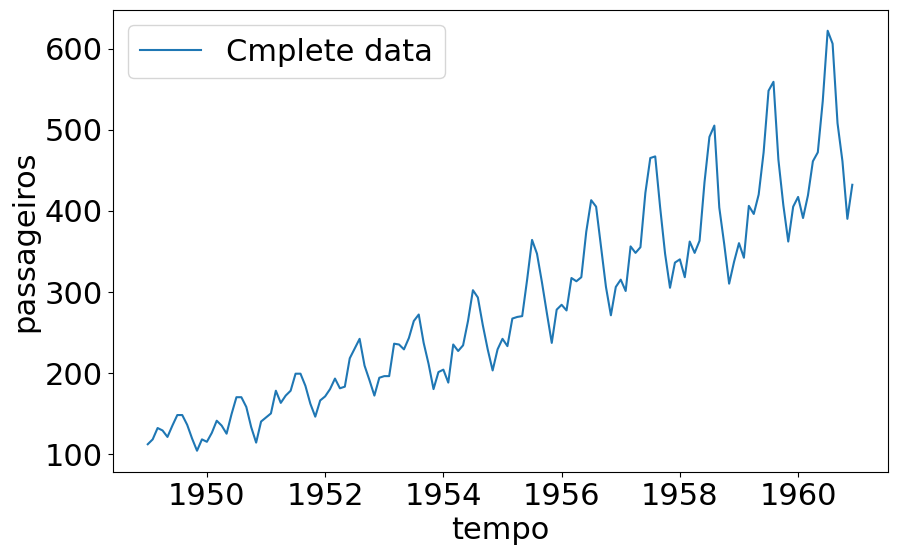

In [64]:
import seaborn as sns
sns.lineplot(data=data, x='tempo', y='passageiros', label='Cmplete data')

##Normalizing the data

<Axes: >

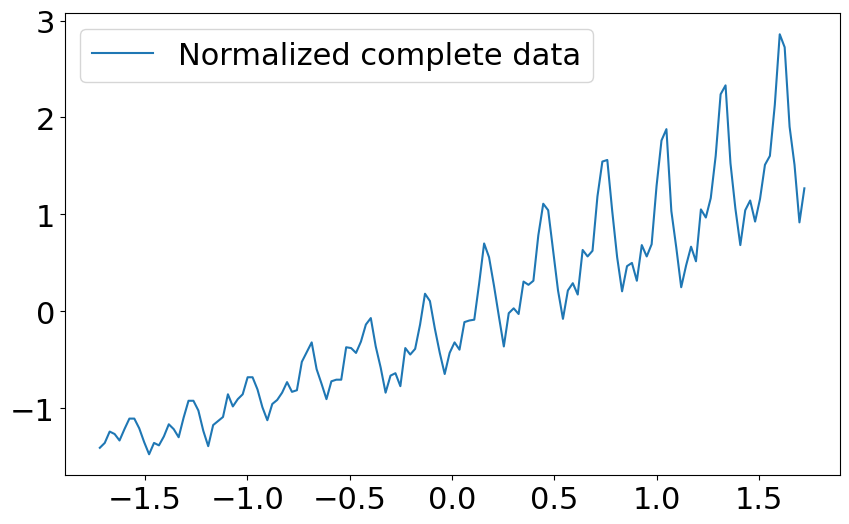

In [65]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler(copy=True, with_mean=True, with_std=True)
normal_data =  normalizer.fit_transform(data)
x= normal_data[:,0]
y= normal_data[:,1]
sns.lineplot(x=x, y=y, label='Normalized complete data')

#Spliting the data

In [66]:
train_size= int(len(normal_data)*0.9)
test_size= len(normal_data)-train_size
x_train=x[0:train_size]
y_train=y[0:train_size]
x_test=x[train_size:len(normal_data)]
y_test=y[train_size:len(normal_data)]

<Axes: >

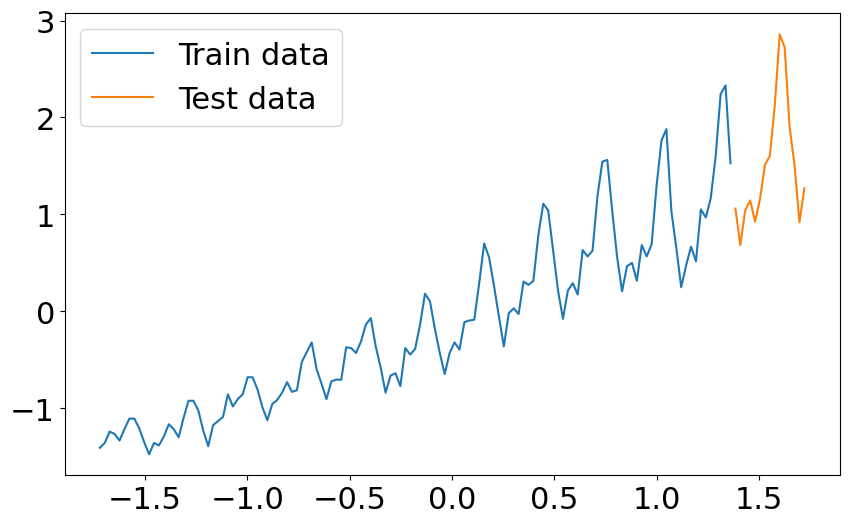

In [67]:
sns.lineplot(x=x_train, y=y_train, label='Train data')
sns.lineplot(x=x_test, y=y_test, label='Test data') #data that will be predicted

# Making a linear regression

In [68]:
get_ipython().system('pip install tensorflow')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
regressor = Sequential()
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=True))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


All neurons can have their weights changed by an activation function, or by simply changing their weights using an initializer or by code. In this case, all weight values will start as 1 and with activated by a linnear function.


In [70]:
regressor.fit(x_train,y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.1285


5/5 [==============================] - 0s 2ms/step


<Axes: >

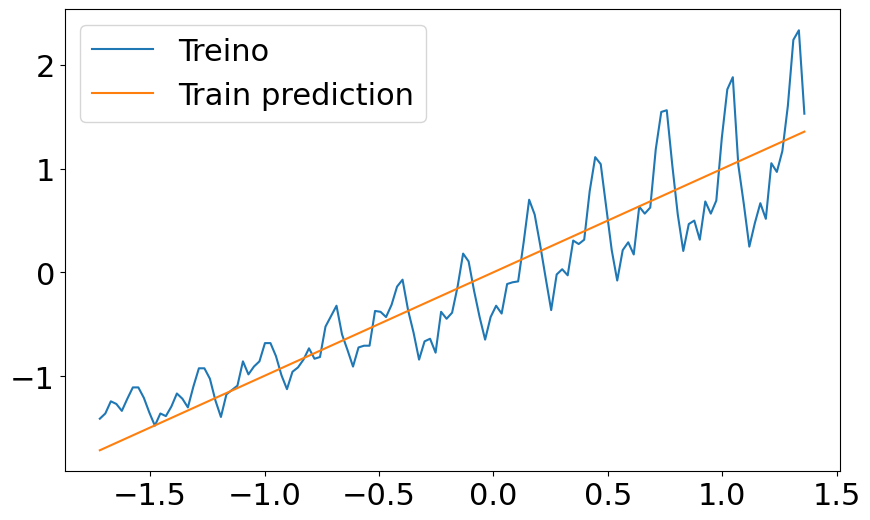

In [71]:
y_pred = regressor.predict(x_train)
sns.lineplot(x=x_train, y=y_train, label='Treino')
sns.lineplot(x=x_train, y=y_pred[:,0], label='Train prediction')

Well a line seens to be in the middle of the train data. This is a good sign, but what if one wont use any bias values?

5/5 [==============================] - 0s 2ms/step


<Axes: >

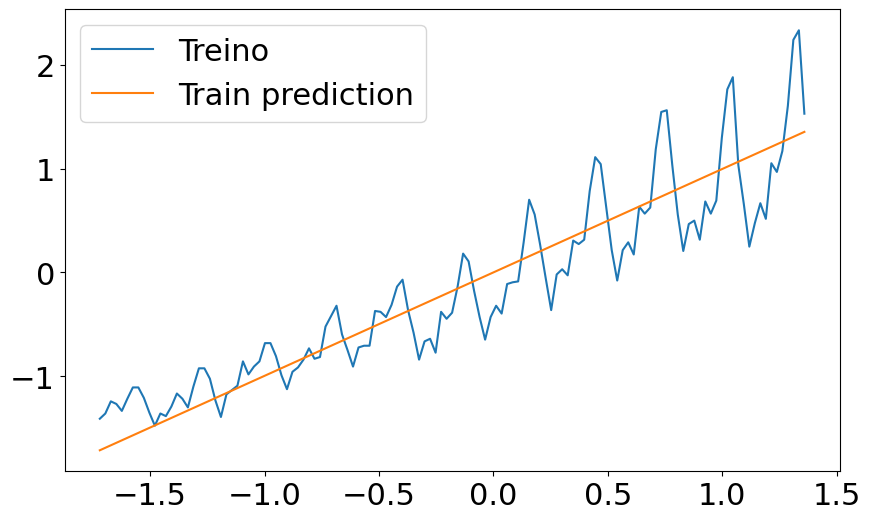

In [72]:
reg_no_bias = Sequential()
reg_no_bias.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear',
                      use_bias=False))#changed here
reg_no_bias.compile(loss='mean_squared_error', optimizer='adam')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_train)
sns.lineplot(x=x_train, y=y_train, label='Treino')
sns.lineplot(x=x_train, y=y_pred[:,0], label='Train prediction')

Bias does not affect the model's tendency line, so it will not be used.

Nice one has a model that can predict y=-1 when x=1.something. What does this mean? Weren't one suposed to predict the quantity of passengers in a certain time?

Now one will transform the data back and see the results.

# Changing data back

<Axes: xlabel='tempo', ylabel='passageiros'>

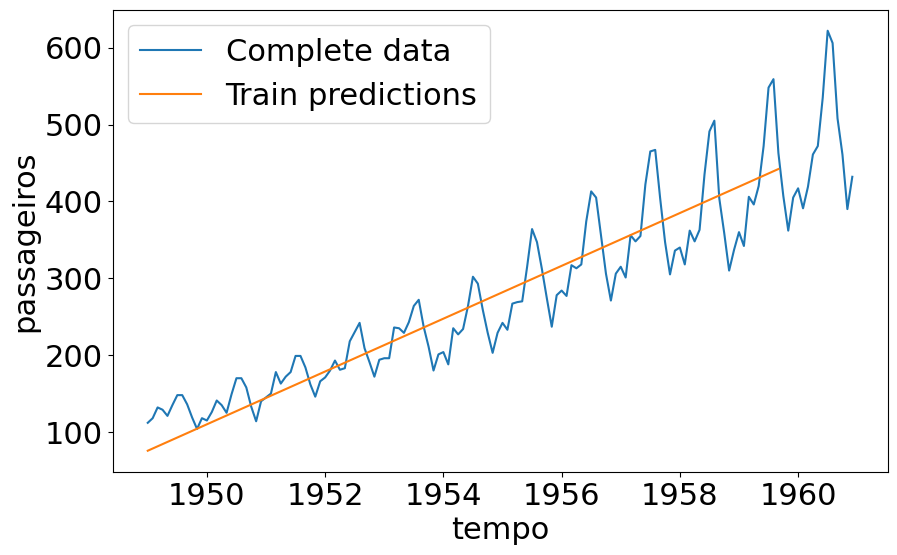

In [73]:
d = {'time':x_train, 'passengers': y_pred[:,0]}
results = pd.DataFrame(data=d)
true_results = normalizer.inverse_transform(results)
true_results_df = pd.DataFrame(data=true_results, columns=['Time', 'Passengers'])

sns.lineplot(x='tempo', y='passageiros', data=data, label='Complete data')
sns.lineplot(x='Time', y='Passengers', data=true_results_df, label='Train predictions')

## Predicting the test sample

1/1 [==============================] - 0s 21ms/step


<Axes: xlabel='Time', ylabel='Passengers'>

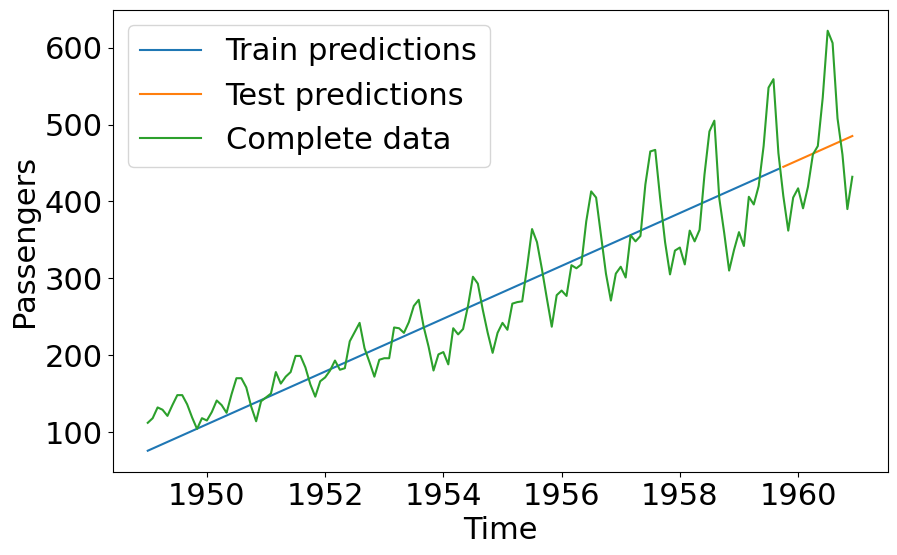

In [74]:
y_pred_test = regressor.predict(x_test)
d = {'time':x_test, 'passengers': y_pred_test[:,0]}
results_test = pd.DataFrame(data=d)
true_results_test = normalizer.inverse_transform(results_test)
true_results_df_test = pd.DataFrame(data=true_results_test, columns=['Time', 'Passengers'])

sns.lineplot(x='Time', y='Passengers', data=true_results_df, label='Train predictions')
sns.lineplot(x='Time', y='Passengers', data=true_results_df_test, label='Test predictions')
sns.lineplot(x='tempo', y='passageiros', data=data, label='Complete data')

Nice this simple model can be used to predict the test data, but what about the future?

# Adding more layers

In [75]:
#creating a new sequential object
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))
regressor2.add(Dense(8, #input here is equal to the layer behind this
                     kernel_initializer='random_uniform',activation='linear', use_bias=False))
regressor2.add(Dense(1, #input here is equal to the layer behind this
                     kernel_initializer='random_uniform', #this will be the output layer
                     activation='linear', use_bias=False))
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 8)                 8         
                                                                 
 dense_27 (Dense)            (None, 8)                 64        
                                                                 
 dense_28 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [76]:
regressor2.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 0.8095
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8091
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8085
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8076
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8065
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8049
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8027
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7999
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7956
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7902
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7832
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7755
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 22ms/step


<Axes: >

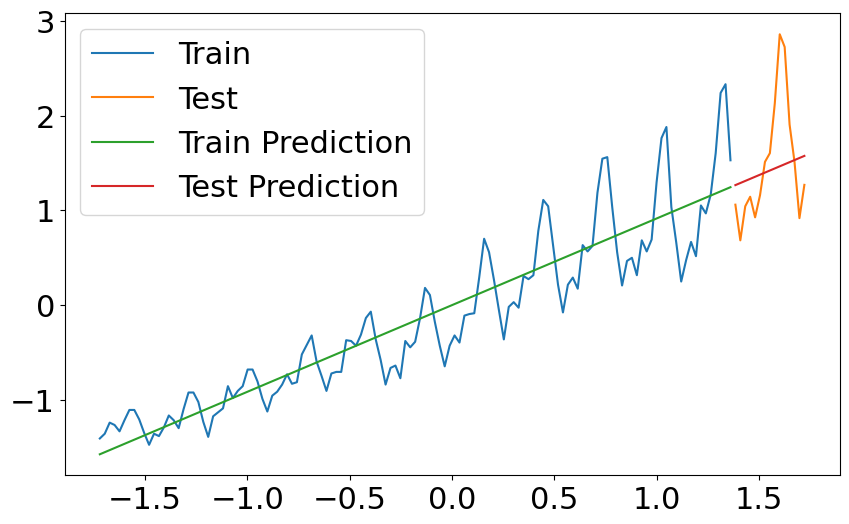

In [77]:
y_pred= regressor2.predict(x_train)
y_pred_test = regressor2.predict(x_test)

sns.lineplot(x=x_train, y=y_train, label='Train')
sns.lineplot(x=x_test, y=y_test, label='Test')
sns.lineplot(x=x_train, y=y_pred[:,0], label='Train Prediction')
sns.lineplot(x=x_test, y=y_pred_test[:,0], label='Test Prediction')

Same results as the other network...why? One added more layers and neurons and no improvements. This happened because all activations were linear. Linear combinations can only return linear results. In neuroscience, the neurons can return linear results, but in almost all cases they return nonlinear results, like the sigmoid function.

Now the next sequential will have the sigmoid activation.

## Adding the sigmoid function

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8430
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8373
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8339
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8290
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8233
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8173
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8114
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8073
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8034
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8002
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7964
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7924
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

<Axes: >

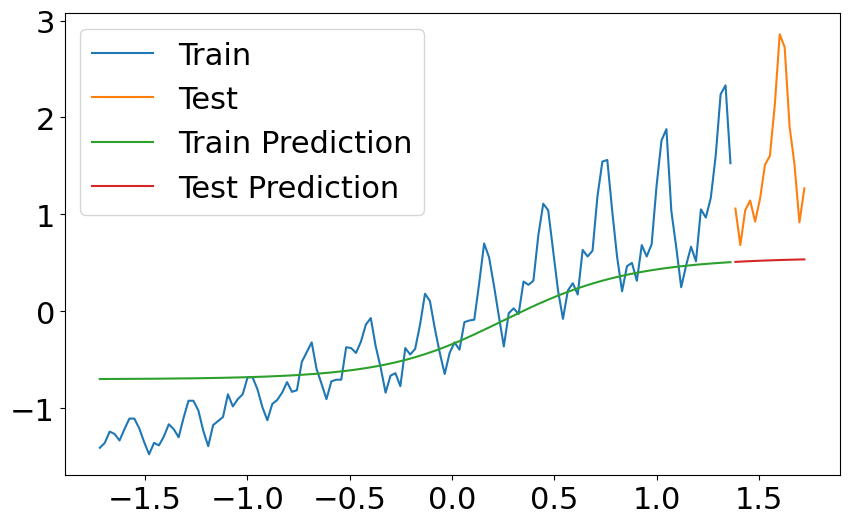

In [78]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor3.add(Dense(8,kernel_initializer='random_uniform',activation='sigmoid', #changed function
                     use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', #changed function
                     use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(x_train, y_train, epochs=500) #increased to 500 for better training

y_pred= regressor3.predict(x_train)
y_pred_test = regressor3.predict(x_test)

sns.lineplot(x=x_train, y=y_train, label='Train')
sns.lineplot(x=x_test, y=y_test, label='Test')
sns.lineplot(x=x_train, y=y_pred[:,0], label='Train Prediction')
sns.lineplot(x=x_test, y=y_pred_test[:,0], label='Test Prediction')

Little by little, the model is getting more fitted to the truth, but still needs to be improved. Visually it can't even be evaluated, because it is clear that the model is different from the data plot.

A new approach is necessary...

## Adding and relating 2 outputs

The data has passengers and the time, currently the model only returns y, which is the quantity of passengers in that x (time).

The aim now will be creating a function that can return new x and y values, tyo create a new dataset, based on the old one. This dataset will be used to make 2 outputs and an even better model.

In [79]:
vector= pd.DataFrame(y_train)[0]
import numpy as np

def data_new(vector, n_steps):
  x_new, y_new=[],[]
  for i in range(n_steps, vector.shape[0]):
    x_new.append(list(vector.loc[i-n_steps:i-1]))
    y_new.append(vector.loc[i])
  x_new, y_new = np.array(x_new), np.array(y_new)
  return x_new, y_new


x_train_new, y_train_new = data_new(vector, 1)
print(x_train_new[0:5],'\n',y_train_new[0:5])

[[-1.40777884]
 [-1.35759023]
 [-1.24048348]
 [-1.26557778]
 [-1.33249593]] 
 [-1.35759023 -1.24048348 -1.26557778 -1.33249593 -1.21538918]


This return show that the y has a delay based on n_steps. Now one will create the new test data.

In [80]:
vector2= pd.DataFrame(y_test)[0]

x_test_new, y_test_new = data_new(vector2, 1)

print(x_test_new[0:5],'\n',y_test_new[0:5])

[[1.05982773]
 [0.68341317]
 [1.04309819]
 [1.14347541]
 [0.92599144]] 
 [0.68341317 1.04309819 1.14347541 0.92599144 1.16020494]


Now one is ready to apply those new train and test samples to the network.

## Back to neural network

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.8703
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7943
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7498
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7274
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7124
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6979
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6807
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6621
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6351
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6098
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5859
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5584
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

<Axes: xlabel='tempo', ylabel='0'>

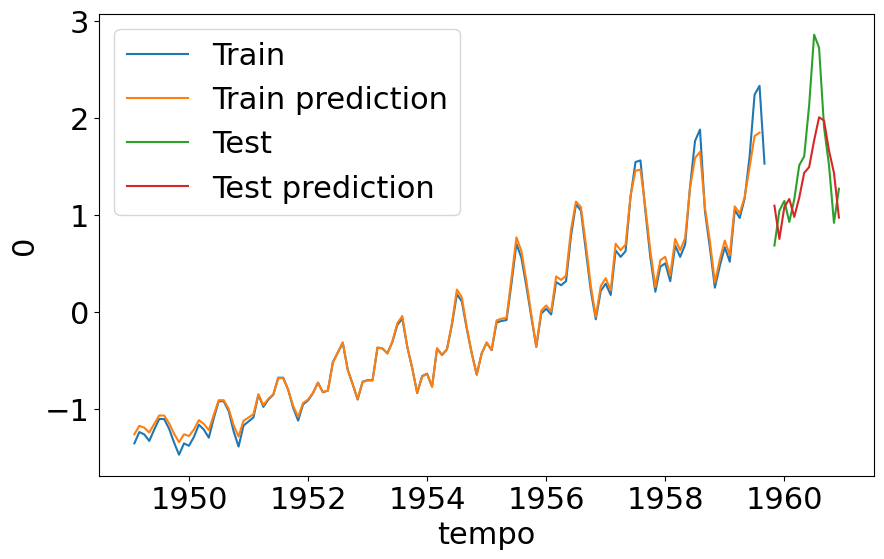

In [81]:
regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=1,kernel_initializer='ones',
                     activation='linear', use_bias=False)) #starting with linnear
regressor4.add(Dense(64, #increased here to 64, now it will take longer to train...
                     kernel_initializer='random_uniform',activation='sigmoid',
                     use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',
                     use_bias=False)) #ending with linnear, since the data is linnear

regressor4.compile(loss='mean_squared_error', optimizer='adam')

regressor4.fit(x_train_new, y_train_new, epochs=100) #more neurons, less epochs

y_pred_new= regressor4.predict(x_train_new)
y_pred_test_new = regressor4.predict(x_test_new)

#used the old data, but removed 1 since n_step=1
sns.lineplot(x='tempo', y=y_train_new, data=data[1:129], label='Train')
sns.lineplot(x='tempo', y=pd.DataFrame(y_pred_new)[0], data=data[1:129], label='Train prediction')
#used the old data, but remember the test data is from 130 to 144
sns.lineplot(x='tempo', y=y_test_new, data=data[130:144], label='Test')

result = pd.DataFrame(y_pred_test_new)[0]

sns.lineplot(x='tempo', y=result.values, data=data[130:144], label='Test prediction')


The model improved a lot. One got a good prediction of next year's quantity of passengers for the airway company. Now one has to test this with a higher n_steps value to see if it can perform in a further away future.

## Predicting the far future

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7468
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6640
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5917
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5314
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4696
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4059
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3466
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2940
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2444
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1769
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1582
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

<Axes: xlabel='tempo', ylabel='0'>

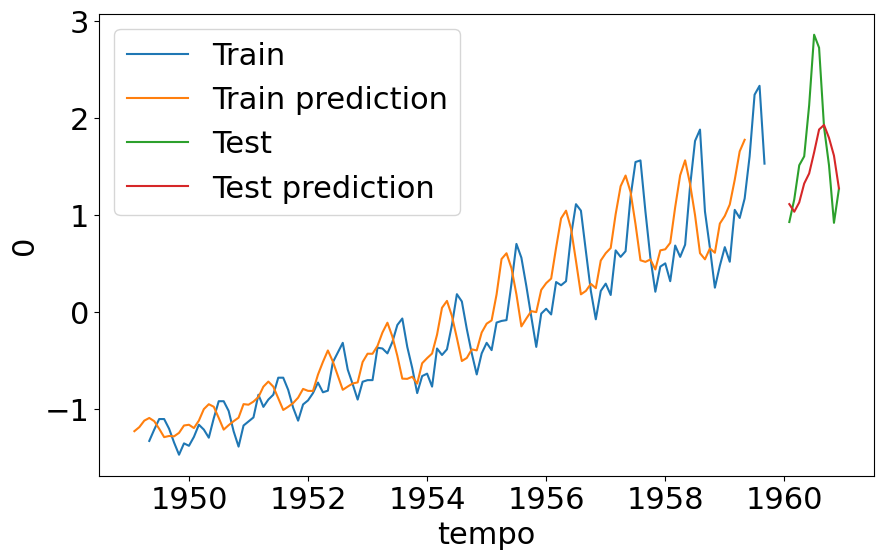

In [82]:
#using n_steps=4
vector= pd.DataFrame(y_train)[0]
x_train_new, y_train_new = data_new(vector, 4)

vector2= pd.DataFrame(y_test)[0]
x_test_new, y_test_new = data_new(vector2, 4)

regressor5 = Sequential()
regressor5.add(Dense(8,input_dim=4, #n_steps=4=input_dim
                     kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor5.add(Dense(64, kernel_initializer='random_uniform',activation='sigmoid',
                     use_bias=False))
regressor5.add(Dense(1, kernel_initializer='random_uniform', activation='linear',
                     use_bias=False))

regressor5.compile(loss='mean_squared_error', optimizer='adam')

regressor5.fit(x_train_new, y_train_new, epochs=300) #This is empiric.
#In general, when increasing the input_dim it is recommended to increase the epochs too

y_pred_new= regressor5.predict(x_train_new)
y_pred_test_new = regressor5.predict(x_test_new)

#used the old data, but removed 4 since n_step=4
sns.lineplot(x='tempo', y=y_train_new, data=data[4:129], label='Train')
sns.lineplot(x='tempo', y=pd.DataFrame(y_pred_new)[0], data=data[1:129], label='Train prediction')
#used the old data, but remember the test data is from 130 to 144
sns.lineplot(x='tempo', y=y_test_new, data=data[133:144], label='Test')

result = pd.DataFrame(y_pred_test_new)[0]

sns.lineplot(x='tempo', y=result.values, data=data[133:144], label='Test prediction')


Now one got a model that could require more training, but still the prediction is not too bad. The model is receiving 4 values and returning only 1 with certain precision.

The airway company is happy with the result of 4 years predicted by this model.

# A new challenge appears

Now one is faced with the challenge of creating a model that tha can predict the quantity of bikes that were rented, based on other characteristics like the weather or if it is a holiday.

the prediction will be based on the hour and date, along with the quantity of bikes in that time. Again it is a regression problem.

In [83]:
data2 = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
data2.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


First, the 'datas' columns, must be converted to a new standard created by the Pandas library.

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

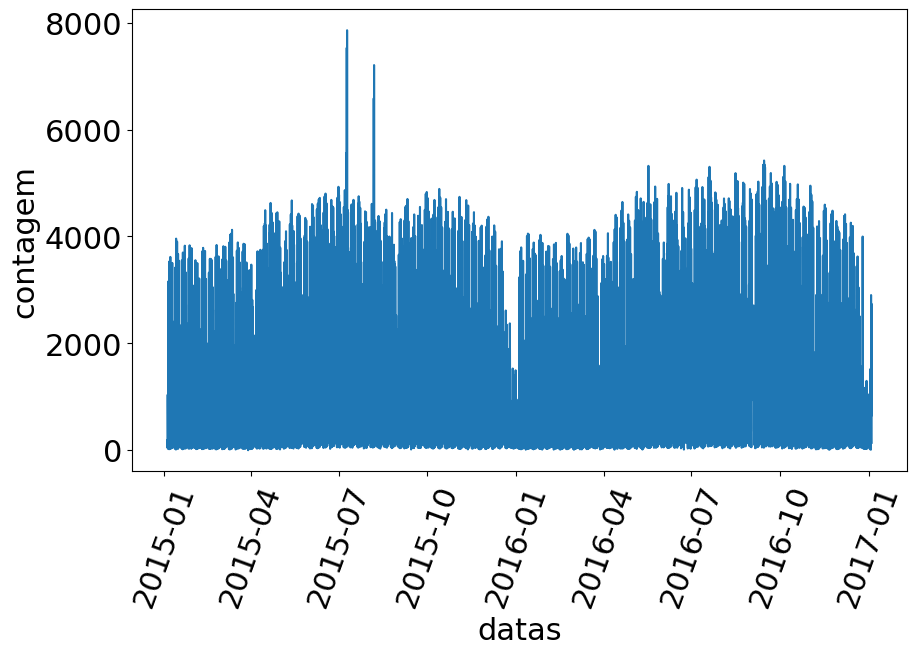

In [84]:
data2['datas'] = pd.to_datetime(data2['datas'])
sns.lineplot(data=data2, x='datas', y='contagem')
plt.xticks(rotation=70)

Executing the same process as the previous job required.

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

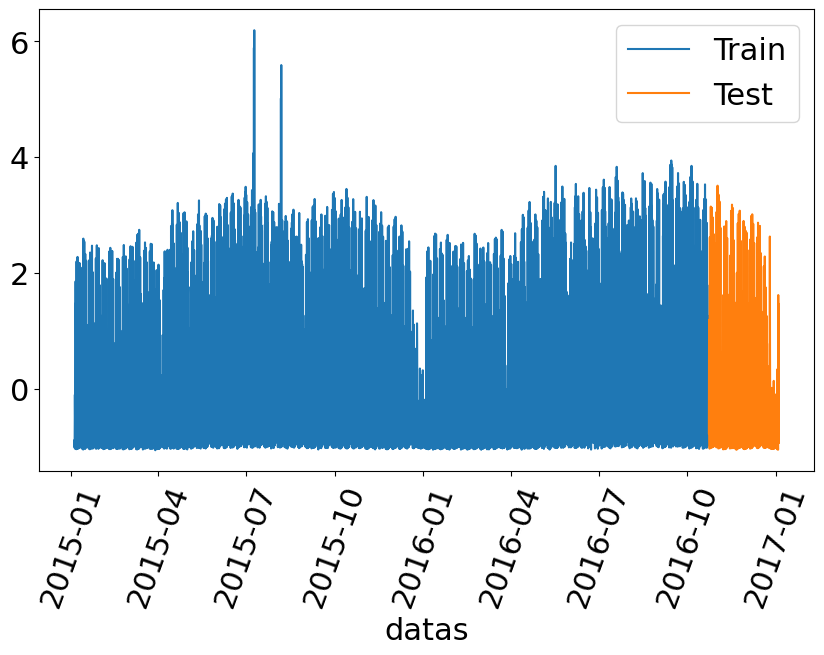

In [85]:
normalizer2 = StandardScaler()
y = normalizer2.fit_transform(data2['contagem'].values.reshape(-1,1))
train_size= int(len(data2)*0.9)
test_size= len(data2)-train_size
#x_train=x[0:train_size]
y_train=y[0:train_size]
#x_test=x[train_size:len(normal_data)]
y_test=y[train_size:len(data2)]

sns.lineplot(data=data2[0:train_size], x='datas', y=y_train[:,0], label='Train')
sns.lineplot(data=data2[train_size:len(data2)], x='datas', y=y_test[:,0], label='Test')
plt.xticks(rotation=70)

In [86]:
#using n_steps=4
vector= pd.DataFrame(y_train)[0]
x_train_new, y_train_new = data_new(vector, 10) #empiracally choosing 10, because the dataset is bigger

vector2= pd.DataFrame(y_test)[0]
x_test_new, y_test_new = data_new(vector2, 10)


# Using recurrent neural networks

As it was done for the airway company. The data was prepared for the neural network. A regression could be one of the solutions for the problem the bike shop is inquiring about, but there is also another way to solve it.

On time series every count in that specific time is correlated with the other variables or columns. The correlation carries certain information that will be used by the neural network to classify things. In the bike shop case, one will use a neural network that can loop between its hidden layers, in other words, a recurrent neural network.

In [87]:
#adding  a third dimension to the data, that will be time
x_train_new = x_train_new.reshape((x_train_new.shape[0], x_train_new.shape[1], 1))
x_test_new = x_test_new.reshape((x_test_new.shape[0], x_test_new.shape[1], 1))

LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network (RNN) architecture. It is designed to overcome the limitations of traditional RNNs in capturing and remembering long-term dependencies in sequential data.

Unlike regular RNNs, LSTM has a more complex structure that includes memory cells and gates. These components work together to allow the network to selectively retain or forget information from previous time steps, enabling it to capture long-range dependencies.

At each time step, LSTM receives an input and the previous hidden state. It then computes the values for its gates based on the input and the previous state. The input gate controls how much new information is added to the memory cell, the forget gate determines what information is discarded from the cell, and the output gate determines what information is passed to the next time step.

The memory cell serves as a long-term memory storage, allowing the LSTM to learn and remember patterns over long sequences. It can retain information for an extended period, which helps in addressing the vanishing gradient problem often encountered in traditional RNNs.

LSTM networks have found applications in various fields, including natural language processing, speech recognition, time series analysis, and more. They have proven to be effective in modeling and predicting sequential data by capturing both short-term and long-term dependencies.

In [43]:
import time
from tensorflow.keras.layers import LSTM

start_time = time.time()

recurrent = Sequential()
recurrent.add(LSTM(128, input_shape=(x_train_new.shape[1],x_train_new.shape[2])))
recurrent.add(Dense(units=1))

recurrent.compile(loss='mean_squared_error', optimizer='RMSProp')

result_LSTM = recurrent.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new),
              epochs=100)

y_pred= recurrent.predict(x_train_new)
y_pred_test = recurrent.predict(x_test_new)

end_time = time.time()
elapsed_time_LSTM = end_time - start_time
print(f'It took {elapsed_time_LSTM/60} minutes to train LSTM')

Epoch 1/100
490/490 [==============================] - 14s 24ms/step - loss: 0.2828 - val_loss: 0.1043
Epoch 2/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0832 - val_loss: 0.0417
Epoch 3/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0586 - val_loss: 0.0373
Epoch 4/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0490 - val_loss: 0.0403
Epoch 5/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0448 - val_loss: 0.0332
Epoch 6/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0419 - val_loss: 0.0364
Epoch 7/100
490/490 [==============================] - 12s 25ms/step - loss: 0.0405 - val_loss: 0.0275
Epoch 8/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0383 - val_loss: 0.0322
Epoch 9/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0367 - val_loss: 0.0260
Epoch 10/100
490/490 [==============================] - 10s 21ms/step - loss

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

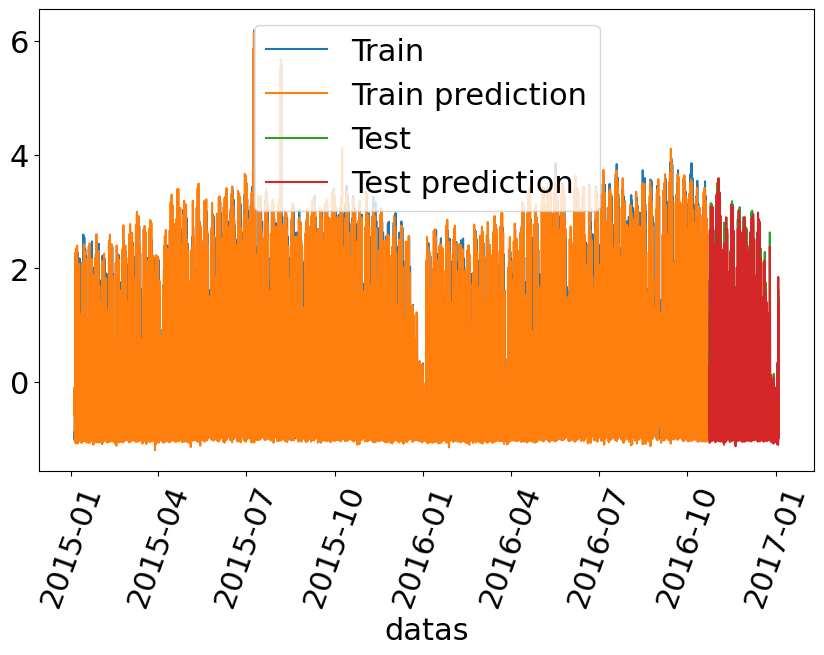

In [44]:
sns.lineplot(x='datas', y=y_train[:,0], data=data2[0:train_size], label='Train')
sns.lineplot(x='datas', y=y_pred[:,0], data=data2[0:15662], label='Train prediction')
sns.lineplot(x='datas', y=y_test[:,0], data=data2[train_size:len(data2)], label='Test')
sns.lineplot(x='datas', y=y_pred_test[:,0], data=data2[train_size+10:len(data2)], label='Test prediction')

plt.xticks(rotation=70)


The RMSProp is used to prevent problems like the exploding gradient, which is a common problem on networks like this applied to solve jobs like the bike shop one.

Visually the result was great, the model captured a good part of the behavior in this time series. The training took almost 19 minutes, this is the only problem now. Now one will compare if another kind of recurrent can be faster and better than the LSTM.

## Using Recurrent GRU

In [89]:

start_time = time.time()

from tensorflow.keras.layers import GRU

rec_GRU = Sequential()
rec_GRU.add(GRU(128, input_shape=(x_train_new.shape[1],x_train_new.shape[2])))
rec_GRU.add(Dense(units=1))

rec_GRU.compile(loss='mean_squared_error', optimizer='RMSProp')

result_GRU =rec_GRU.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new),
              epochs=100)

y_pred_gru= rec_GRU.predict(x_train_new)
y_pred_gru_test = rec_GRU.predict(x_test_new)

end_time = time.time()
elapsed_time_GRU = end_time - start_time
print(f'It took {elapsed_time_GRU/60} minutes to train GRU')

Epoch 1/100
490/490 [==============================] - 10s 16ms/step - loss: 0.2377 - val_loss: 0.0813
Epoch 2/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0685 - val_loss: 0.0320
Epoch 3/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0500 - val_loss: 0.0375
Epoch 4/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0446 - val_loss: 0.0248
Epoch 5/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0402 - val_loss: 0.0270
Epoch 6/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0380 - val_loss: 0.0265
Epoch 7/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0363 - val_loss: 0.0202
Epoch 8/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0348 - val_loss: 0.0193
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0335 - val_loss: 0.0216
Epoch 10/100
490/490 [==============================] - 8s 16ms/step - loss: 0.03

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

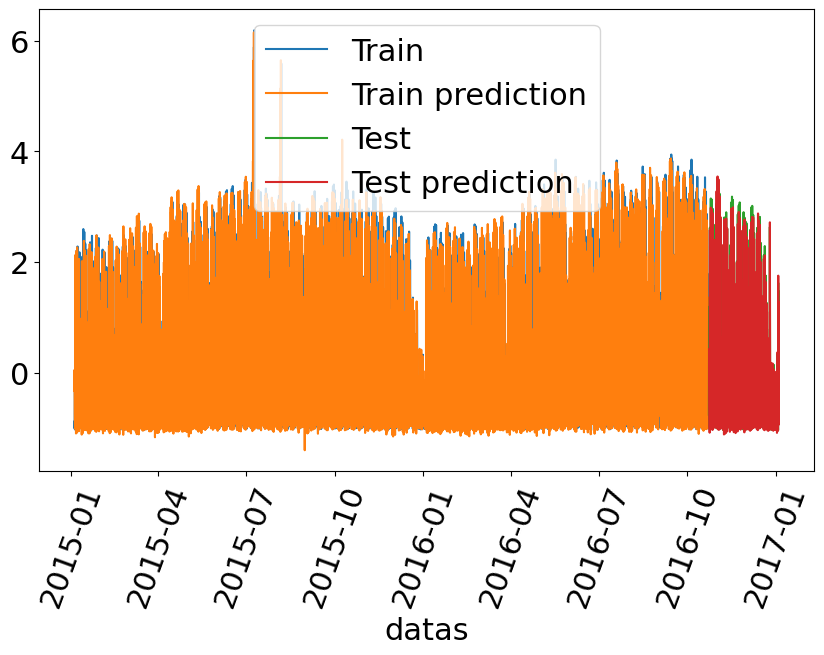

In [90]:
sns.lineplot(x='datas', y=y_train[:,0], data=data2[0:train_size], label='Train')
sns.lineplot(x='datas', y=y_pred_gru[:,0], data=data2[0:15662], label='Train prediction')
sns.lineplot(x='datas', y=y_test[:,0], data=data2[train_size:len(data2)], label='Test')
sns.lineplot(x='datas', y=y_pred_gru_test[:,0], data=data2[train_size+10:len(data2)], label='Test prediction')
plt.xticks(rotation=70)

Well, it seems that the LSTM model takes longer to be trained and the GRU takes less time. The values of loss and validation loss from for each model had little difference. As a final decision, the GRU will be selected for the prediction of bikes in the future.

Text(0, 0.5, 'Cost')

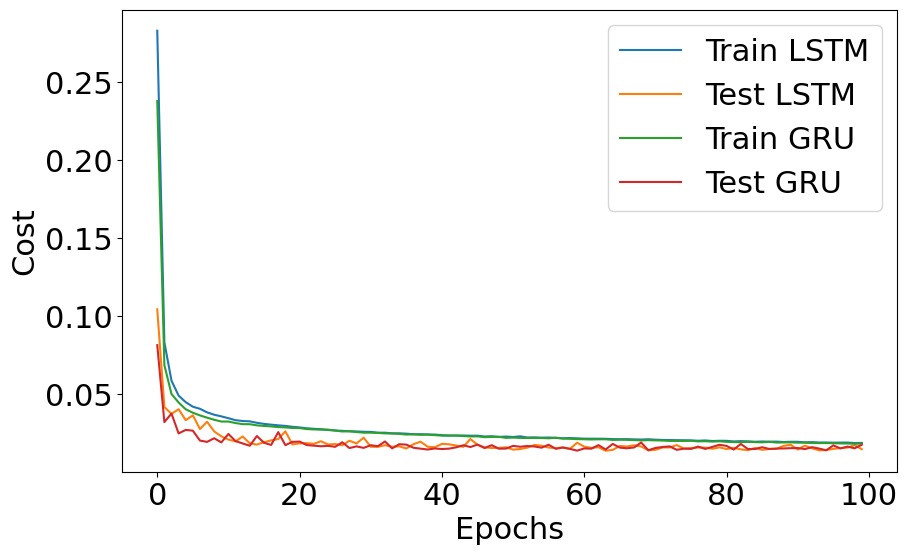

In [91]:
plt.plot(result_LSTM.history['loss'])
plt.plot(result_LSTM.history['val_loss'])
plt.plot(result_GRU.history['loss'])
plt.plot(result_GRU.history['val_loss'])
plt.legend(['Train LSTM', 'Test LSTM', 'Train GRU', 'Test GRU'])
plt.xlabel('Epochs')
plt.ylabel('Cost')

Based on this plot, one can see that there is no overfitting.
The model converged!
Now the model is trained and can predict the number of bikes for rent in a certain time.
Still, a doubt floats in one's minds with the question...